In [3]:
import pandas as pd
url="/content/ratings_small.csv"
full_data=pd.read_csv(url)
full_data.head

<bound method NDFrame.head of         userId  movieId  rating   timestamp
0            1       31     2.5  1260759144
1            1     1029     3.0  1260759179
2            1     1061     3.0  1260759182
3            1     1129     2.0  1260759185
4            1     1172     4.0  1260759205
...        ...      ...     ...         ...
99999      671     6268     2.5  1065579370
100000     671     6269     4.0  1065149201
100001     671     6365     4.0  1070940363
100002     671     6385     2.5  1070979663
100003     671     6565     3.5  1074784724

[100004 rows x 4 columns]>

In [9]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines = 1)
Fulldata = Dataset.load_from_file('./ratings_small.csv', reader=reader)

In [11]:
pmf_svd = SVD()
cv_pmf = cross_validate(pmf_svd, Fulldata, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8910  0.8999  0.8911  0.8991  0.9023  0.8967  0.0047  
MAE (testset)     0.6868  0.6943  0.6850  0.6939  0.6945  0.6909  0.0041  
Fit time          9.94    5.12    5.14    5.13    5.13    6.09    1.92    
Test time         0.26    0.24    0.16    0.26    0.24    0.23    0.04    


In [14]:
sim_options = {'user_based': True}
user_based_cf = KNNBasic(sim_options=sim_options)
cv_ub = cross_validate(user_based_cf, Fulldata, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9644  0.9676  0.9730  0.9697  0.9624  0.9674  0.0038  
MAE (testset)     0.7404  0.7445  0.7507  0.7436  0.7401  0.7439  0.0038  
Fit time          0.15    0.19    0.21    0.19    0.19    0.19    0.02    
Test time         2.30    1.65    1.59    1.77    1.65    1.79    0.26    


In [15]:
sim_options = {'user_based': False}
item_based_cf = KNNBasic(sim_options=sim_options)
cv_ib = cross_validate(item_based_cf, Fulldata, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9383  0.9352  0.9372  0.9345  0.9275  0.9345  0.0038  
MAE (testset)     0.7255  0.7216  0.7223  0.7199  0.7152  0.7209  0.0034  
Fit time          4.30    4.38    4.04    5.63    4.40    4.55    0.56    
Test time         7.32    7.40    7.39    7.37    7.72    7.44    0.14    


In [17]:
pmf = ('PMF', cv_pmf['test_mae'].mean(), cv_pmf['test_rmse'].mean())
user_cf = ('User based CF', cv_ub['test_mae'].mean(), cv_ub['test_rmse'].mean())
item_cf = ('Item based CF', cv_ib['test_mae'].mean(), cv_ib['test_rmse'].mean())

results = [pmf, user_cf, item_cf]

print("%-12s %12s %12s" % ('Algorithm', 'MAE Mean', 'RMSE Mean'))

for res in results:
  if res[0] == 'PMF':
    print("%-8s %14.3f %12.3f" % (res[0], res[1], res[2]))
  else:
    print("%-8s %9.3f %12.3f" % (res[0], res[1], res[2]))

Algorithm        MAE Mean    RMSE Mean
PMF               0.691        0.897
User based CF     0.744        0.967
Item based CF     0.721        0.935


In [18]:
similarities = ['cosine', 'msd', 'pearson']
measures = ['RMSE', 'MAE']
run_results = {
    'ucf': dict(),
    'icf': dict()
}

for similarity in similarities:
  user_based_cf = KNNBasic(sim_options={'name': similarity, 'user_based': True})
  item_based_cf = KNNBasic(sim_options={'name': similarity, 'user_based': False})

  print(f"Calculating {similarity} for User Based CF")
  cross_validate_user_based_cf = cross_validate(user_based_cf, Fulldata, measures, verbose=True, cv=5)

  print(f"Calculating {similarity} for Item Based CF")
  cross_validate_item_based_cf = cross_validate(item_based_cf, Fulldata, measures, verbose=True, cv=5)

  run_results['ucf'][similarity] = cross_validate_user_based_cf
  run_results['icf'][similarity] = cross_validate_item_based_cf

Calculating cosine for User Based CF
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9909  0.9948  0.9933  0.9941  0.9986  0.9943  0.0025  
MAE (testset)     0.7659  0.7684  0.7654  0.7666  0.7736  0.7680  0.0030  
Fit time          0.46    0.44    0.44    0.44    0.41    0.44    0.02    
Test time         1.62    1.64    1.80    1.65    1.69    1.68    0.06    
Calculating cosine for Item Based CF
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matr

In [19]:
plot_data = {
    'mae': {
      'cosine': [],
      'msd': [],
      'pearson': []
    },
    'rmse': {
      'cosine': [],
      'msd': [],
      'pearson': []
    }
}

for k, v in run_results.items():
  for key, result in run_results[k].items():
    plot_data['mae'][key].append(result['test_mae'].mean())
    plot_data['rmse'][key].append(result['test_rmse'].mean())

In [20]:
plot_data

{'mae': {'cosine': [0.7679768341077239, 0.7747195980418604],
  'msd': [0.7440911208352625, 0.7200823389263635],
  'pearson': [0.7731041752067923, 0.7680122962819848]},
 'rmse': {'cosine': [0.994342982847275, 0.9959574985209823],
  'msd': [0.9683246135483939, 0.9341710889272117],
  'pearson': [0.9989032692027602, 0.9896742299400809]}}

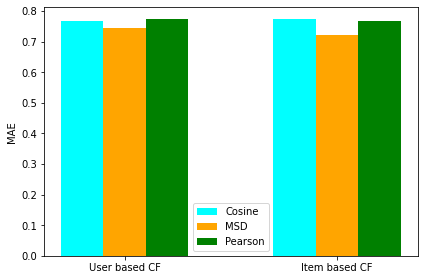

In [21]:
labels = ['User based CF', 'Item based CF']

x = np.arange(len(labels))  # the label locations
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, plot_data['mae']['cosine'], width, color='cyan')
plt.bar(x, plot_data['mae']['msd'], width, color='orange')
plt.bar(x+0.2, plot_data['mae']['pearson'], width, color='green')

plt.xticks(x, labels)
plt.ylabel("MAE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.tight_layout()

plt.show()

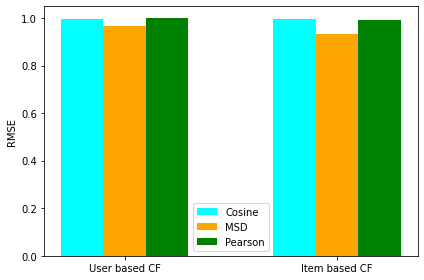

In [22]:
labels = ['User based CF', 'Item based CF']

x = np.arange(len(labels))  # the label locations
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, plot_data['rmse']['cosine'], width, color='cyan')
plt.bar(x, plot_data['rmse']['msd'], width, color='orange')
plt.bar(x+0.2, plot_data['rmse']['pearson'], width, color='green')

plt.xticks(x, labels)
plt.ylabel("RMSE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.tight_layout()

plt.show()

In [23]:
min_k_value = 1
mean = 99999
ucf_k_results = []

for i in range(20):
  knn_ucf = KNNBasic(sim_options={'user_based': True}, k=i)
  cv_knn_ucf = cross_validate(knn_ucf, Fulldata, measures, verbose=True, cv=5)

  curr_mean = cv_knn_ucf['test_rmse'].mean()
  if curr_mean < mean:
    mean = curr_mean
    min_k_value = i
  ucf_k_results.append(curr_mean)
  print(i)

print(min_k_value, mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0615  1.0525  1.0521  1.0661  1.0581  1.0581  0.0054  
MAE (testset)     0.8523  0.8467  0.8460  0.8546  0.8494  0.8498  0.0033  
Fit time          0.30    0.18    0.20    0.20    0.20    0.22    0.04    
Test time         0.96    0.77    0.89    0.76    0.78    0.83    0.08    
0
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing

In [24]:
min_k_value = 1
mean = 99999
icf_k_results = []

for i in range(20):
  knn_ucf = KNNBasic(sim_options={'user_based': False}, k=i)
  cv_knn_ucf = cross_validate(knn_ucf, Fulldata, measures, verbose=True, cv=5)

  curr_mean = cv_knn_ucf['test_rmse'].mean()
  if curr_mean < mean:
    mean = curr_mean
    min_k_value = i
  icf_k_results.append(curr_mean)

print(min_k_value, mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0662  1.0619  1.0545  1.0554  1.0523  1.0581  0.0052  
MAE (testset)     0.8551  0.8526  0.8480  0.8477  0.8457  0.8498  0.0035  
Fit time          4.48    4.30    3.99    4.13    4.05    4.19    0.18    
Test time         4.15    4.26    4.51    4.23    4.90    4.41    0.27    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

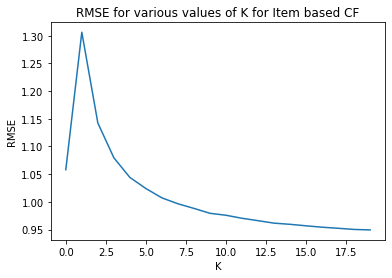

In [25]:
plt.plot(icf_k_results)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for various values of K for Item based CF")
plt.show()

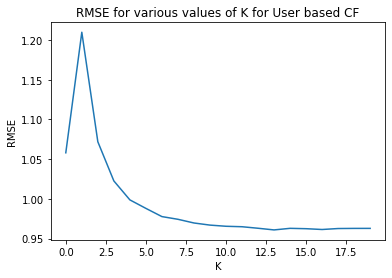

In [26]:
plt.plot(ucf_k_results)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for various values of K for User based CF")
plt.show()

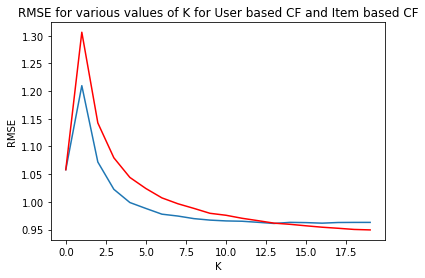

In [27]:
plt.plot(ucf_k_results)
plt.plot(icf_k_results, color='r')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for various values of K for User based CF and Item based CF")
plt.show()